4.2769816212634545e-05
5.626406008518567e-05
2.9726408583525706e-05
0.005022595693867579
0.00531207349540069
0.0082042251873992
0.06109768924026315
0.035896611141709896
0.07127903394448573
0.07659516315623055
0.04347633571339283
0.26742021268795174
0.09126211316090647
0.379473390988306


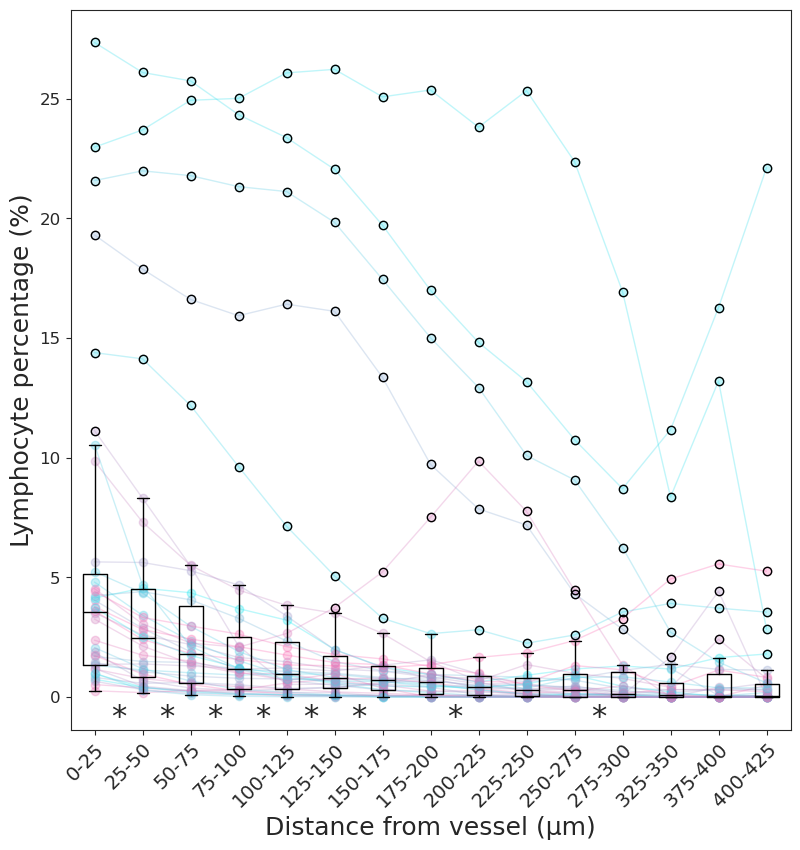

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 10 12:12:21 2020

@author: whitma01
"""


import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

sns.set_style("ticks")

colors = [(29/256.0, 236/256.0, 244/256.0),(253/256.0, 105/256.0, 179/256.0)]
cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name, colors, N=64)

data = genfromtxt('regional_analysis/lymphocyte_vessel_percentage.csv', delimiter=',')

fig = plt.figure(figsize=(9, 9))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

random.seed(30)
for n in range(1, data.shape[0]):
    color_value = random.random()
    ax.plot( range(0,15), data[n,1:16], marker='o', color=newcmp(color_value), linewidth=1, alpha=0.3)

data_to_plot = [data[1:,1], data[1:,2], data[1:,3], data[1:,4], data[1:,5], data[1:,6], data[1:,7], data[1:,8],\
                data[1:,9], data[1:,10], data[1:,11], data[1:,12], data[1:,13], data[1:,14], data[1:,15]]
positions = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
c = "black"
ax.boxplot(data_to_plot, positions=positions,
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

# ax.set_title('lymphocyte percentages')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['0-25','25-50','50-75','75-100','100-125','125-150','150-175','175-200','200-225','225-250','250-275','275-300','325-350','375-400','400-425'])
plt.xlabel('Distance from vessel (μm)', fontsize=18)
plt.ylabel('Lymphocyte percentage (%)', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, rotation_mode='anchor', ha="right", fontsize=14)

plt.yticks(fontsize=12)
ymin, ymax = ax.get_ylim()
diff = ymax - ymin

for n in range(1, 15):
    r, p = stats.ttest_rel(data[1:,n], data[1:,n+1])
    print(p)
    if p < 0.05:
        plt.text(n-0.65, -diff/25, "*", fontsize=22)


plt.show()
fig.savefig("regional_analysis/lymphocyte_vessel.pdf", bbox_inches = 'tight')
